## Задание 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import mixture
from itertools import cycle, islice

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
points = X
points

array([[ 4.67143114,  3.93973466],
       [ 1.97552198,  0.05339147],
       [-0.59165564,  7.33623698],
       ...,
       [-3.26026403, -1.82053081],
       [-4.50973949, -1.10980335],
       [ 0.29075162, -6.4777484 ]])

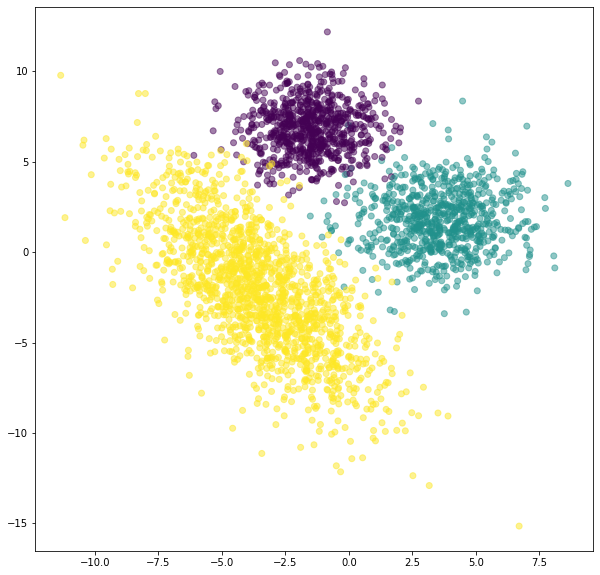

In [6]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [7]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

(3000, 2)

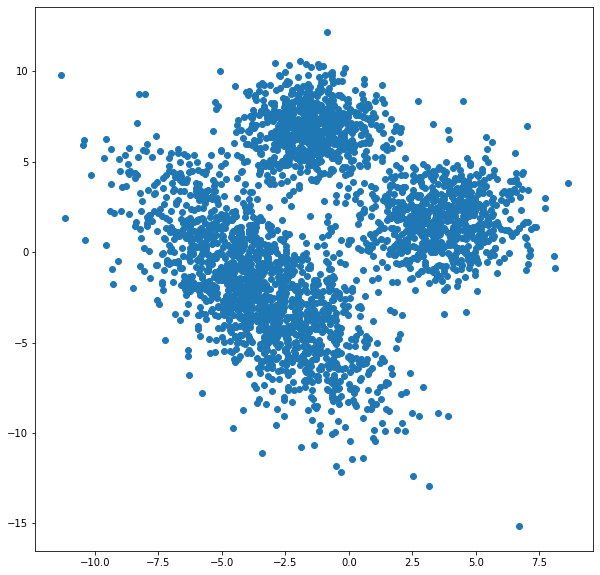

In [8]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, init='k-means++', random_state=42)
k_means.fit(points)
plt.scatter(X[:,0],X[:,1])
points.shape

# 

In [9]:
clusters = k_means.cluster_centers_

In [10]:
clusters

array([[-3.18996384, -2.90484307],
       [-2.38363475,  6.23391526],
       [ 3.6296089 ,  1.74479425]])

In [11]:
y_km = k_means.fit_predict(points)

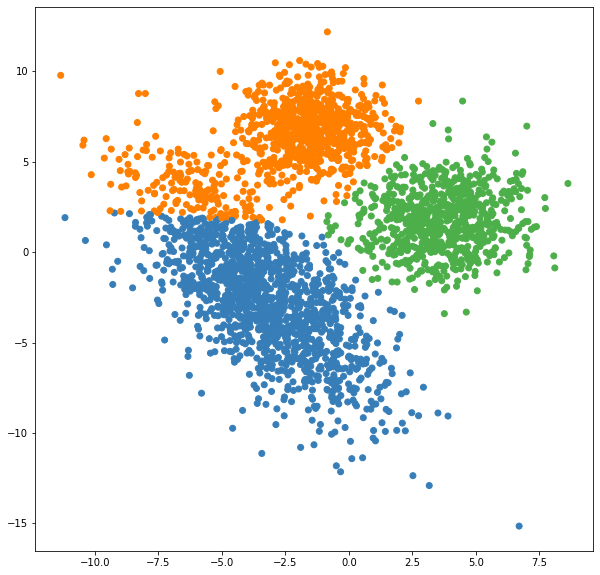

In [12]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_km) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_km])

## Задание 2

In [13]:
unique, counts = np.unique(y_km, return_counts=True)
dict(zip(unique, counts))

{0: 1320, 1: 938, 2: 742}

## Задание 3


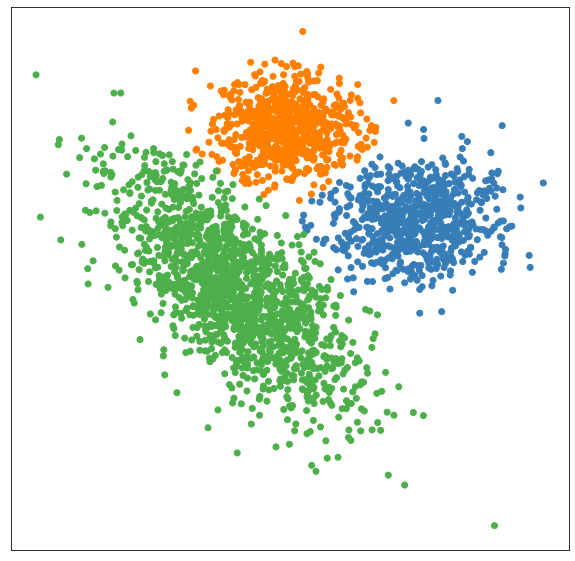

In [14]:
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(points)
y_pred = GM.predict(X)

plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']),int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [15]:

GM.means_

array([[ 3.60809518,  1.73760829],
       [-1.50915711,  6.80752253],
       [-3.54551222, -2.12358327]])

## Задание 4


In [16]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 744, 1: 763, 2: 1493}

## Задание 5

In [17]:
from sklearn.cluster import AgglomerativeClustering
import warnings

from sklearn.neighbors import kneighbors_graph

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(points)

AgglomerativeClustering(n_clusters=3)

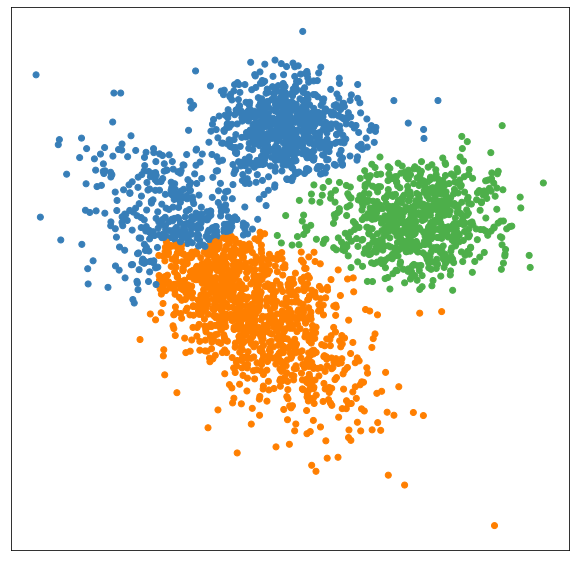

In [19]:
y_pred = ac.labels_.astype(int)

plt.xticks([]); plt.yticks([])

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])